Text(0, 0.5, 'Pacientes')

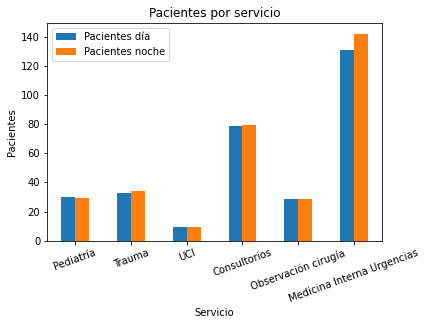

In [18]:
# %matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_name = 'dataset_hospital2.xlsx'
df = pd.read_excel(file_name, sheet_name = 1)

def get_average_by_month(dataframe, month, column, time):
    service_raw = (dataframe['Servicio'] == month) & (dataframe['Espacio de tiempo'] == time)
    
    service = dataframe[service_raw]
    service.dropna(subset = [column], inplace = True)
    return np.average(service[column].astype(int))

avg_ped = get_average_by_month(df, 'Pediatría', 'Pacientes', 'Día')
avg_tra = get_average_by_month(df, 'Trauma', 'Pacientes', 'Día')
avg_uci = get_average_by_month(df, 'UCI', 'Pacientes', 'Día')
avg_con = get_average_by_month(df, 'Consultorios', 'Pacientes', 'Día')
avg_cir = get_average_by_month(df, 'Observación cirugía', 'Pacientes', 'Día')
avg_int = get_average_by_month(df, 'Medicina Interna Urgencias', 'Ocupación (%)', 'Día')

avg_ped_night = get_average_by_month(df, 'Pediatría', 'Pacientes', 'Noche')
avg_tra_night = get_average_by_month(df, 'Trauma', 'Pacientes', 'Noche')
avg_uci_night = get_average_by_month(df, 'UCI', 'Pacientes', 'Noche')
avg_con_night = get_average_by_month(df, 'Consultorios', 'Pacientes', 'Noche')
avg_cir_night = get_average_by_month(df, 'Observación cirugía', 'Pacientes', 'Noche')
avg_int_night = get_average_by_month(df, 'Medicina Interna Urgencias', 'Ocupación (%)', 'Noche')

services = ['Pediatría', 'Trauma', 'UCI', 'Consultorios', 'Observación cirugía', 'Medicina Interna Urgencias']

day = [avg_ped, avg_tra, avg_uci, avg_con, avg_cir, avg_int]
night = [avg_ped_night, avg_tra_night, avg_uci_night, avg_con_night, avg_cir_night, avg_int_night]

new_df = pd.DataFrame({
    'Pacientes día': day,
    'Pacientes noche': night
}, index = services)


new_df.plot(kind = 'bar')

plt.title('Pacientes por servicio')
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.xlabel('Servicio')
plt.ylabel('Pacientes')
